In [2]:
# Let's import the aln model
from neurolib.models.aln import ALNModel

# Create the model
aln = ALNModel()

# Each model comes with a set of default parameters which are are a dictionary. 
# Let's change the parameter that controls the duration of a simulation to 10s.
aln.params['duration'] = 10.0 * 1000  

# For convenience, we could also use:
aln.params.duration = 10.0 * 1000

# In the aln model an Ornstein-Uhlenbeck process is simulated in parallel
# as the source of input noise fluctuations. Here we can set the variance
# of the process. 
# For more info: https://en.wikipedia.org/wiki/Ornstein%E2%80%93Uhlenbeck_process 
# Let's add some noise.
aln.params['sigma_ou'] = 0.1

# Finally, we run the model
aln.run()

In [3]:
aln.outputs.keys()

dict_keys(['t', 'rates_exc', 'rates_inh', 'IA'])

In [4]:
aln.rates_exc.shape

(1, 100000)

In [5]:
t = aln.t
output = aln.output

print(t.shape)

(100000,)


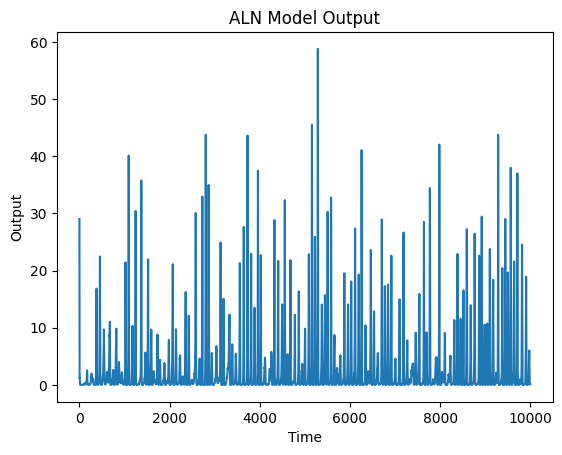

In [6]:
import matplotlib.pyplot as plt

# Assign the values of aln.t and aln.output
t = aln.t
output = aln.output[0]

# Plot the output as a function of time
plt.plot(t, output)
plt.xlabel('Time')
plt.ylabel('Output')
plt.title('ALN Model Output')
plt.show()


In [7]:
aln.params["mue_ext_mean"]

0.4

In [8]:
import numpy as np

# initialize the model
aln = ALNModel()
aln.params['duration'] = 2.0*1000

# lists that will conatin the results
max_outputs = []
min_outputs = []
# these are the different input values that we want to scan
inputs = np.linspace(0, 2, 50)

# cycle through all input values
for mue in inputs:
    # Note: this has to be a vector since it is input for all nodes
    # (but we have only one node in this example)
    aln.params['mue_ext_mean'] = mue
    aln.run()
    # we add the maximum and the minimum of the last second of the 
    # simulation to a list
    max_outputs.append(np.max(aln.output[0, -int(1000/aln.params['dt']):]))
    min_outputs.append(np.min(aln.output[0, -int(1000/aln.params['dt']):]))


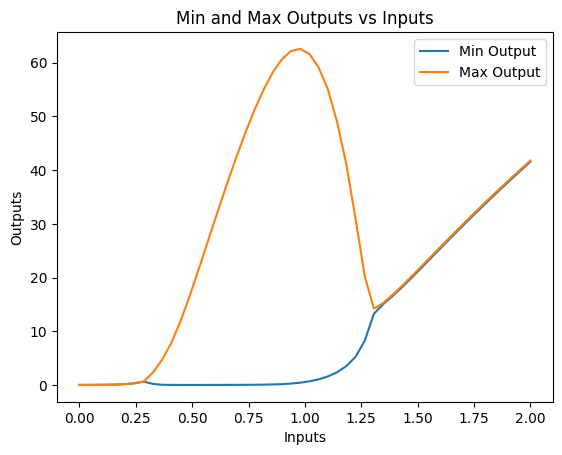

In [9]:
import matplotlib.pyplot as plt

# Plot the min and max outputs against the inputs
plt.plot(inputs, min_outputs, label='Min Output')
plt.plot(inputs, max_outputs, label='Max Output')

# Add labels and title to the plot
plt.xlabel('Inputs')
plt.ylabel('Outputs')
plt.title('Min and Max Outputs vs Inputs')

# Add legend
plt.legend()

# Show the plot
plt.show()

In [10]:
from neurolib.utils.loadData import Dataset
ds = Dataset("hcp")
ds.Cmat.shape

(80, 80)

In [11]:
# We load the model, but now with the structural dataset
aln = ALNModel(Cmat = ds.Cmat, Dmat = ds.Dmat)

# Let's run the simulation for a few minutes
aln.params['duration'] = 3*60*1000 

In [12]:
aln.params['mue_ext_mean'] = 1.2
aln.params['mui_ext_mean'] = 1.8
# We set an appropriate level of noise
aln.params['sigma_ou'] = 0.09
# And turn on adaptation with a low value of spike-triggered adaptation currents.
aln.params['b'] = 5.0

In [13]:
aln.run(bold=True)

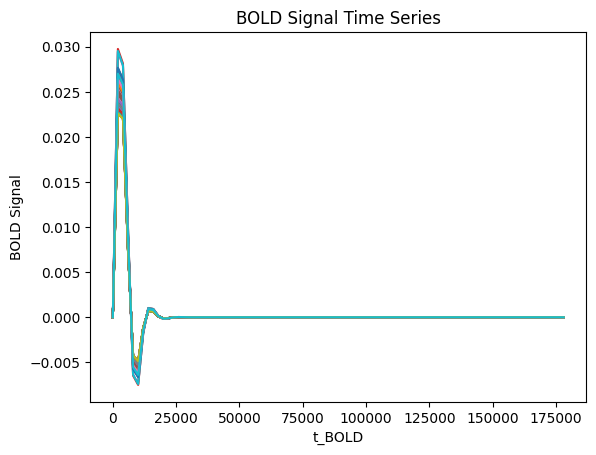

In [14]:
import matplotlib.pyplot as plt

# Get the bold signals and t_BOLD
bold_signals = aln.outputs.BOLD.BOLD
t_BOLD = aln.outputs.BOLD.t_BOLD

# Iterate over the bold signals and plot them
for i in range(bold_signals.shape[0]):
    plt.plot(t_BOLD, bold_signals[i], label=f'BOLD Signal {i+1}')

# Add labels and title to the plot
plt.xlabel('t_BOLD')
plt.ylabel('BOLD Signal')
plt.title('BOLD Signal Time Series')

# Add legend
# plt.legend()

# Show the plot
plt.show()

In [19]:
import neurolib.utils.functions as func

scores = [func.matrix_correlation(func.fc(aln.BOLD.BOLD[:, 5:]), fcemp) for fcemp in ds.FCs]
fc = func.fc(aln.BOLD.BOLD[:, 5:])
fc.shape
fc.min()
# fc.max()

np.float64(0.9999641044605171)

In [20]:
scores = [func.matrix_correlation(func.fc(aln.BOLD.BOLD[:, 5:]), fcemp) for fcemp in ds.FCs]

print("Correlation per subject:", [f"{s:.2}" for s in scores])
print(f"Mean FC/FC correlation: {np.mean(scores):.2}")


Correlation per subject: ['0.11', '0.13', '0.079', '0.065', '0.013', '0.17', '0.096']
Mean FC/FC correlation: 0.095
